Note: you may need to restart the kernel to use updated packages.


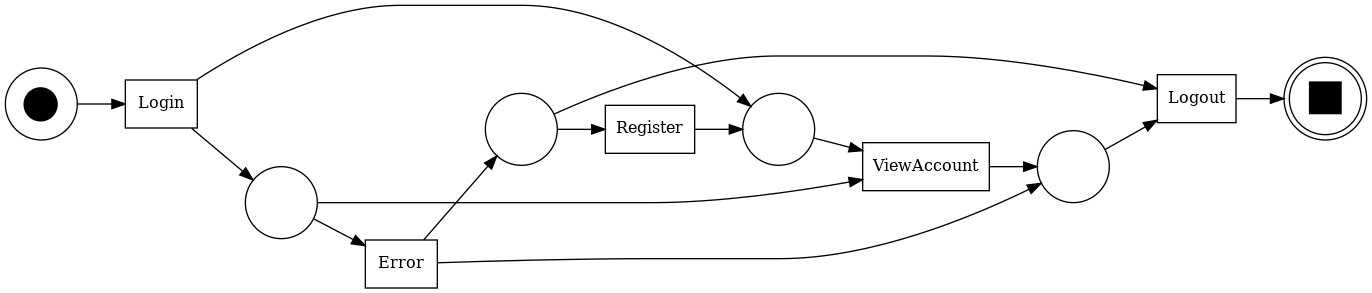

Analisi process mining completata!


In [1]:
# process_mining_example.ipynb

# Esempio d'uso di pm4py per analizzare un log fittizio

%pip install pm4py
# pandas

import pandas as pd
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Se hai un file in formato XES
# log = xes_importer.apply('log_file.xes')

# Se hai un CSV da convertire in XES o log object:
df = pd.read_csv('log_process_mining.csv')  # file fittizio con campi: case_id, activity, timestamp

from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

# 1) Converti eventuali colonne di timestamp in datetime
df = dataframe_utils.convert_timestamp_columns_in_df(df)

# 2) (opzionale) Ordina per timestamp

df = df.sort_values('timestamp')

df = df.rename(columns={
    "case_id": "case:concept:name",
    "activity": "concept:name",
    "timestamp": "time:timestamp"
})

log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)

# 3) Specifica i parametri corretti: cambia i nomi a seconda delle tue colonne
log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)


# Applichiamo l'Alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualizzazione
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

print("Analisi process mining completata!")
